In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt
from math import log
from scipy.optimize import curve_fit

In [44]:
def prepare_data(file):
    ydata = []
    with open(file, encoding='iso-8859-1') as cw_novels:
        lines = cw_novels.readlines()
        for line in lines:
            line = line.replace('\x00','').replace('ÿþ', '').replace('\n', '')
            if re.search(r',', line):
                [count, word] = line.split(', ', maxsplit=1)
                if not re.search(r'\d|\.|_', word) \
                    and re.match(r'^[A-Za-z]+$', word):
                    ydata.insert(0, int(count))
    xdata = [x for x in range(1, len(ydata) + 1)]
    logX = [log(x) for x in xdata]
    logY = [log(y) for y in ydata]
    
    return xdata, ydata, logX, logY

def func_zipf(x, a, b, c):
    return c / (x + b) ** a

def fitting(xdata, ydata, func):
    popt, pcov = curve_fit(
        func, 
        xdata,
        ydata, 
        maxfev=2000
    )
    return popt, pcov

def fmse(xdata, ydata, popt, func):
    x = np.array(list(map(lambda x: func(x, *popt), xdata)))
    y = np.array(ydata)
    return ((x - y)**2).mean(axis=None)

def reduce_head_mse(x_data, y_data, func, max_rem=1000):
    rem = 1
    last_mse = -1
    mse = 0
    while rem < max_rem and abs(last_mse - mse) > 0.01:
        last_mse = mse
        title = 'Removing the {} most frequent words'.format(rem)
        print(title)
        x = x_data[rem:]
        y = y_data[rem:]
        popt, _ = fitting(x, y, func)
        plot_data(title, x, y, popt)
        print('Optimal parameters:', popt)
        mse = fmse(x, y, popt, func)
        print('Mean squared error:', mse)
        print()
        rem += 100

def plot_data(title, xdata, ydata, popt_data=None):
    plt.style.use('bmh')
    plt.title(title)
    plt.plot(xdata, ydata, 'r', label='data')
    plt.xlabel('x')
    plt.ylabel('y', rotation=0)
    if popt_data is not None:
        plt.xlim(left=500)
        plt.ylim(bottom=0, top=500)
        plt.plot(
            xdata, func_zipf(xdata, *popt_data), 
            'b', 
            label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_data)
        )
    plt.legend()
    plt.show()

In [47]:
def explore_data(file):
    title = 'All data'
    print(title)
    x_data, y_data, logX_data, logY_data = prepare_data(file)
    popt_data, pcov_data = fitting(x_data, y_data, func_zipf)
    plot_data(title, x_data, y_data, popt_data)
    print('Optimal parameters:', popt_data)
    mse = fmse(x_data, y_data, popt_data, func_zipf)
    print('Mean squared error:', mse)
    print()
    reduce_head_mse(x_data, y_data, func_zipf, 4500)
    print('Log-log scales:')
    plot_data('Log-log', logX_data, logY_data)

## NOVELS

All data


D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


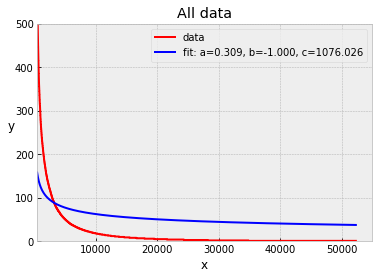

Optimal parameters: [ 3.08752019e-01 -9.99999961e-01  1.07602604e+03]
Mean squared error: 1031548.7079973059

Removing the 1 most frequent words


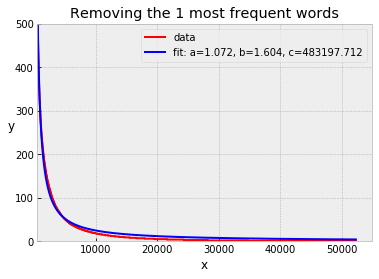

Optimal parameters: [1.07193671e+00 1.60425580e+00 4.83197712e+05]
Mean squared error: 7656.933527056543

Removing the 101 most frequent words


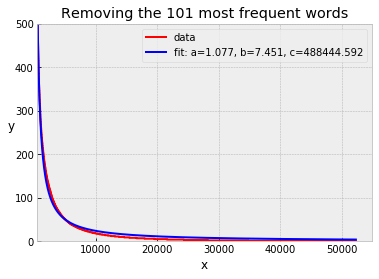

Optimal parameters: [1.07675435e+00 7.45079839e+00 4.88444592e+05]
Mean squared error: 48.183314694710454

Removing the 201 most frequent words


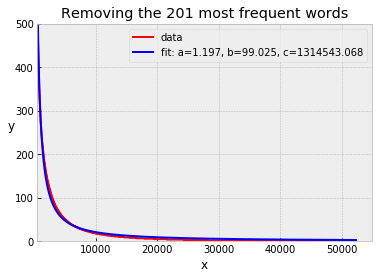

Optimal parameters: [1.19712791e+00 9.90246942e+01 1.31454307e+06]
Mean squared error: 22.419998010074533

Removing the 301 most frequent words


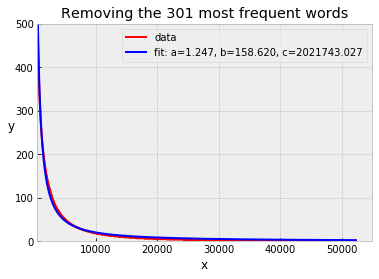

Optimal parameters: [1.24672797e+00 1.58620427e+02 2.02174303e+06]
Mean squared error: 19.392308320874495

Removing the 401 most frequent words


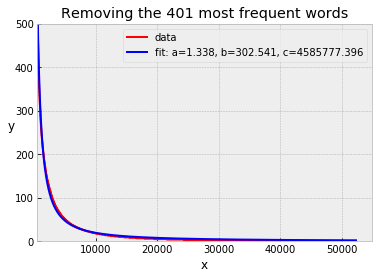

Optimal parameters: [1.33825158e+00 3.02540781e+02 4.58577740e+06]
Mean squared error: 14.214893212667949

Removing the 501 most frequent words


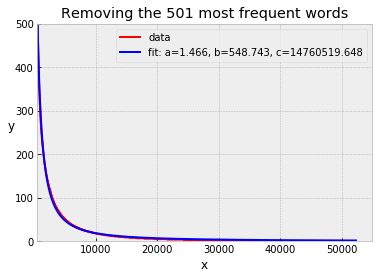

Optimal parameters: [1.46570629e+00 5.48743190e+02 1.47605196e+07]
Mean squared error: 7.663535075138547

Removing the 601 most frequent words


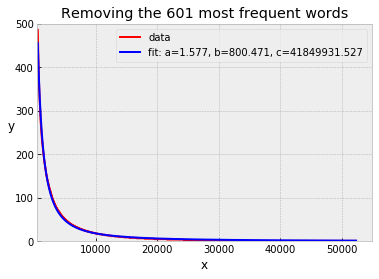

Optimal parameters: [1.57703091e+00 8.00471269e+02 4.18499315e+07]
Mean squared error: 3.9317993564935882

Removing the 701 most frequent words


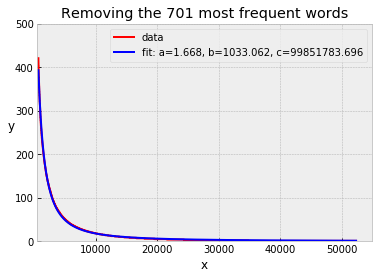

Optimal parameters: [1.66845937e+00 1.03306239e+03 9.98517837e+07]
Mean squared error: 2.092856978797785

Removing the 801 most frequent words


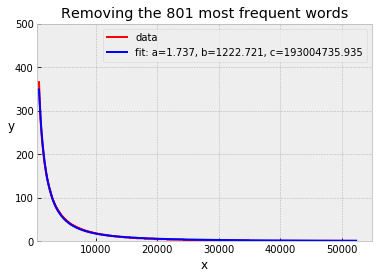

Optimal parameters: [1.73693924e+00 1.22272110e+03 1.93004736e+08]
Mean squared error: 1.239333733771339

Removing the 901 most frequent words


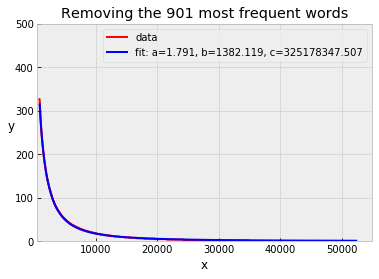

Optimal parameters: [1.79063798e+00 1.38211940e+03 3.25178348e+08]
Mean squared error: 0.8111104555559363

Removing the 1001 most frequent words


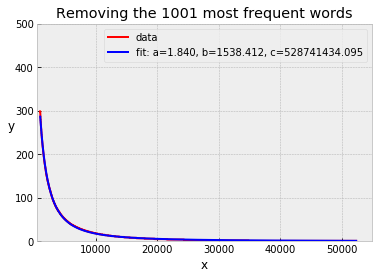

Optimal parameters: [1.84028364e+00 1.53841217e+03 5.28741434e+08]
Mean squared error: 0.49841682660415476

Removing the 1101 most frequent words


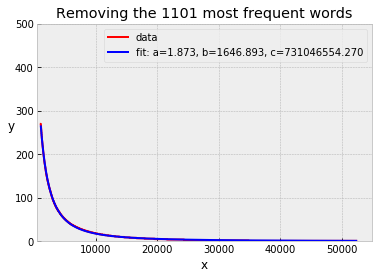

Optimal parameters: [1.87316187e+00 1.64689263e+03 7.31046554e+08]
Mean squared error: 0.3677368263772189

Removing the 1201 most frequent words


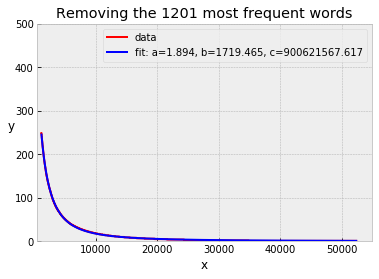

Optimal parameters: [1.89421831e+00 1.71946460e+03 9.00621568e+08]
Mean squared error: 0.32336385915388194

Removing the 1301 most frequent words


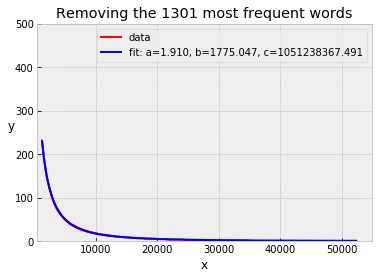

Optimal parameters: [1.90975917e+00 1.77504674e+03 1.05123837e+09]
Mean squared error: 0.30172714283039426

Removing the 1401 most frequent words


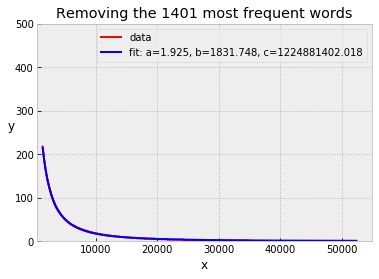

Optimal parameters: [1.92506009e+00 1.83174829e+03 1.22488140e+09]
Mean squared error: 0.2829371305888245

Removing the 1501 most frequent words


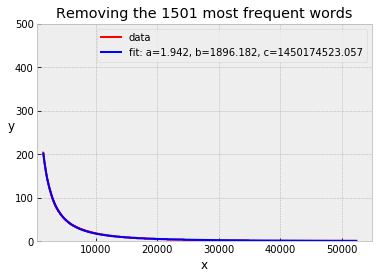

Optimal parameters: [1.94189507e+00 1.89618156e+03 1.45017452e+09]
Mean squared error: 0.262025188560638

Removing the 1601 most frequent words


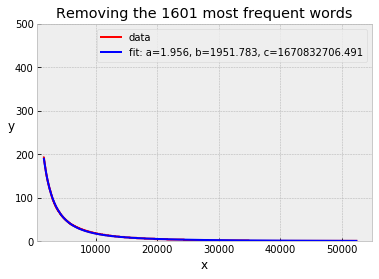

Optimal parameters: [1.95596546e+00 1.95178301e+03 1.67083271e+09]
Mean squared error: 0.24897405641253295

Removing the 1701 most frequent words


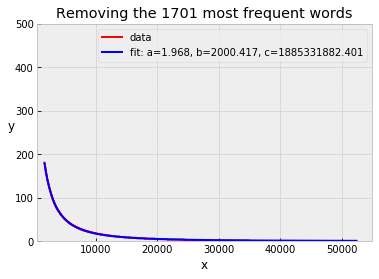

Optimal parameters: [1.96792458e+00 2.00041732e+03 1.88533188e+09]
Mean squared error: 0.24013990734014012

Log-log scales:


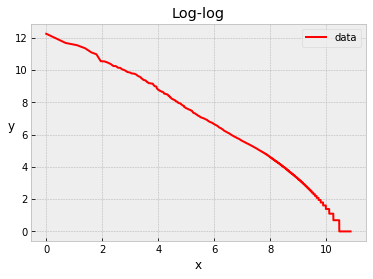

In [48]:
explore_data("cwords_novels.txt")

## NEWS

All data


D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in true_divide


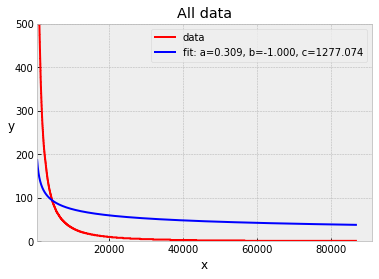

Optimal parameters: [ 3.09443186e-01 -9.99999966e-01  1.27707427e+03]
Mean squared error: 1177982.930562596

Removing the 1 most frequent words


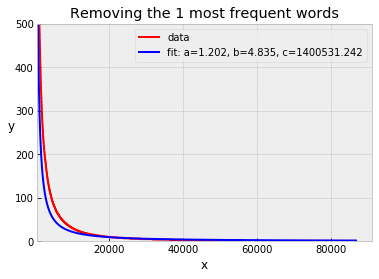

Optimal parameters: [1.20178055e+00 4.83461975e+00 1.40053124e+06]
Mean squared error: 9864.282184904956

Removing the 101 most frequent words


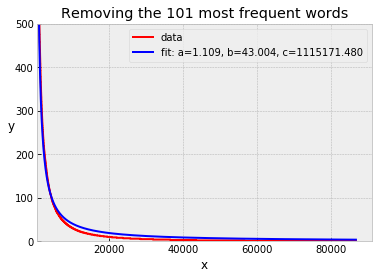

Optimal parameters: [1.10861436e+00 4.30044841e+01 1.11517148e+06]
Mean squared error: 123.62450488960944

Removing the 201 most frequent words


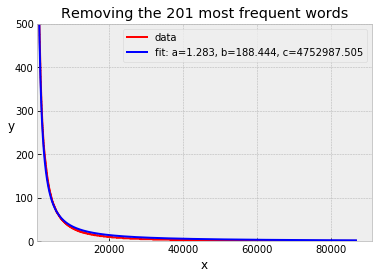

Optimal parameters: [1.28265486e+00 1.88443640e+02 4.75298750e+06]
Mean squared error: 27.26956552790783

Removing the 301 most frequent words


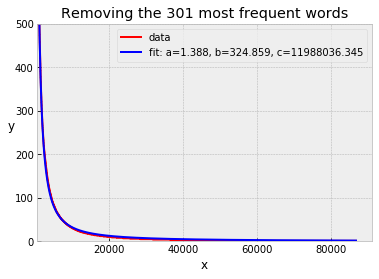

Optimal parameters: [1.38812936e+00 3.24859068e+02 1.19880363e+07]
Mean squared error: 11.452793774474094

Removing the 401 most frequent words


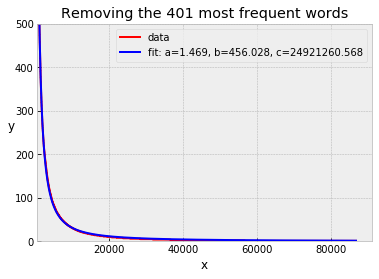

Optimal parameters: [1.46936562e+00 4.56028031e+02 2.49212606e+07]
Mean squared error: 4.427440243904896

Removing the 501 most frequent words


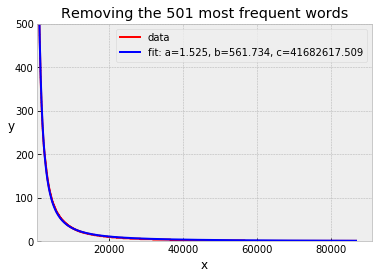

Optimal parameters: [1.52539048e+00 5.61734463e+02 4.16826175e+07]
Mean squared error: 1.5355339067699196

Removing the 601 most frequent words


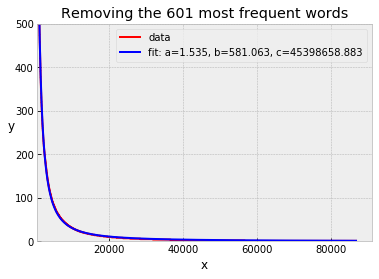

Optimal parameters: [1.53457375e+00 5.81062687e+02 4.53986589e+07]
Mean squared error: 1.4480120486237966

Removing the 701 most frequent words


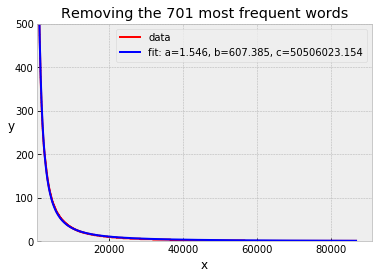

Optimal parameters: [1.54591625e+00 6.07385303e+02 5.05060232e+07]
Mean squared error: 1.369429344938966

Removing the 801 most frequent words


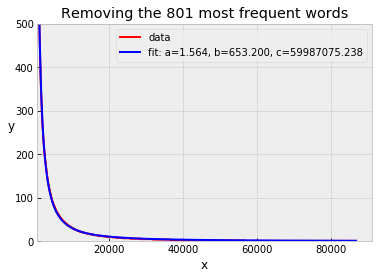

Optimal parameters: [1.56404895e+00 6.53200016e+02 5.99870752e+07]
Mean squared error: 1.1852249959176926

Removing the 901 most frequent words


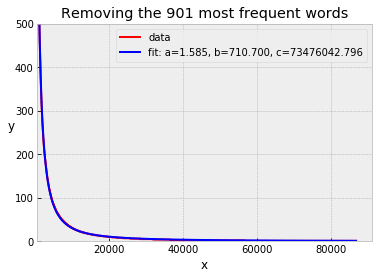

Optimal parameters: [1.58525777e+00 7.10700217e+02 7.34760428e+07]
Mean squared error: 0.9810823628461783

Removing the 1001 most frequent words


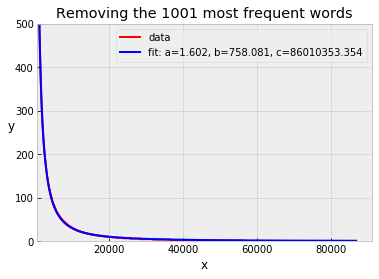

Optimal parameters: [1.60160435e+00 7.58081146e+02 8.60103534e+07]
Mean squared error: 0.8742385495820273

Removing the 1101 most frequent words


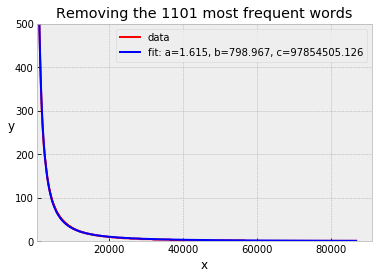

Optimal parameters: [1.61490727e+00 7.98967173e+02 9.78545051e+07]
Mean squared error: 0.8091468846386044

Removing the 1201 most frequent words


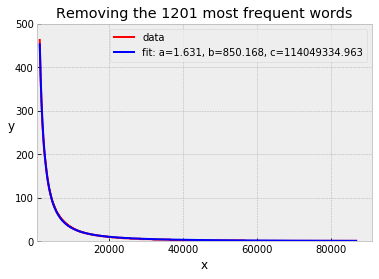

Optimal parameters: [1.63059549e+00 8.50168413e+02 1.14049335e+08]
Mean squared error: 0.7308637716963657

Removing the 1301 most frequent words


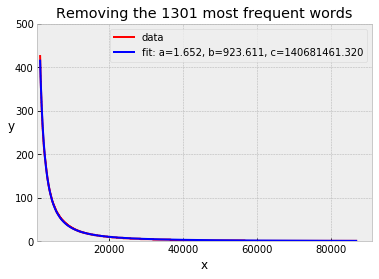

Optimal parameters: [1.65196898e+00 9.23610920e+02 1.40681461e+08]
Mean squared error: 0.6034524220453905

Removing the 1401 most frequent words


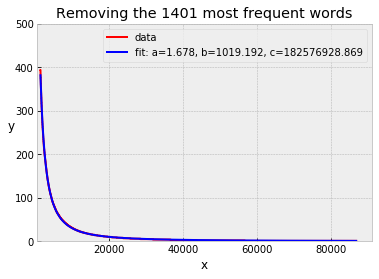

Optimal parameters: [1.67835458e+00 1.01919238e+03 1.82576929e+08]
Mean squared error: 0.4287425826492594

Removing the 1501 most frequent words


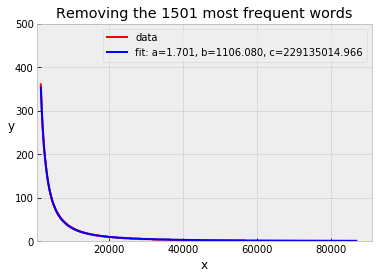

Optimal parameters: [1.70121600e+00 1.10607994e+03 2.29135015e+08]
Mean squared error: 0.30878175920897444

Removing the 1601 most frequent words


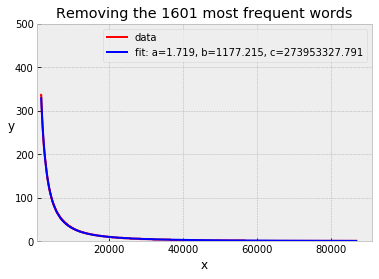

Optimal parameters: [1.71910279e+00 1.17721501e+03 2.73953328e+08]
Mean squared error: 0.24231195701642694

Removing the 1701 most frequent words


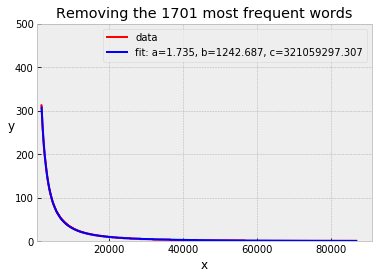

Optimal parameters: [1.73491666e+00 1.24268739e+03 3.21059297e+08]
Mean squared error: 0.19342096469292241

Removing the 1801 most frequent words


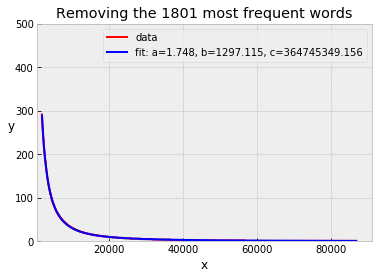

Optimal parameters: [1.74757801e+00 1.29711541e+03 3.64745349e+08]
Mean squared error: 0.16372227203786724

Removing the 1901 most frequent words


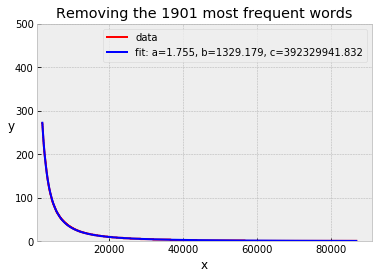

Optimal parameters: [1.75478677e+00 1.32917948e+03 3.92329942e+08]
Mean squared error: 0.15408557460014133

Log-log scales:


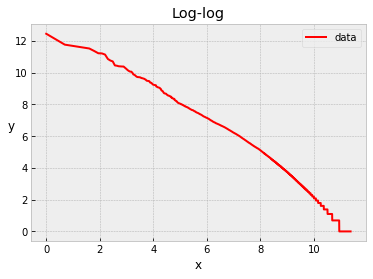

In [49]:
explore_data("cwords_news.txt")

## ARXIV

All data


D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


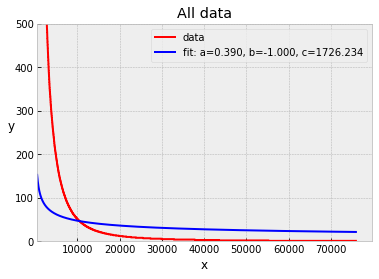

Optimal parameters: [ 3.90327186e-01 -9.99999868e-01  1.72623418e+03]
Mean squared error: 9512219.986703958

Removing the 1 most frequent words


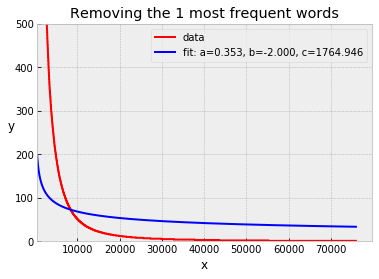

Optimal parameters: [ 3.52952224e-01 -1.99999988e+00  1.76494619e+03]
Mean squared error: 6423126.77479851

Removing the 101 most frequent words


D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in true_divide


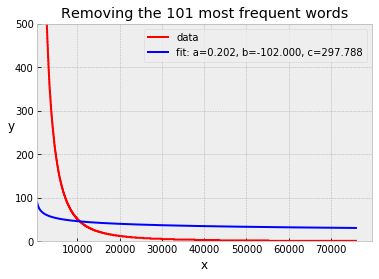

Optimal parameters: [ 2.02357740e-01 -1.02000000e+02  2.97787664e+02]
Mean squared error: 227345.7903459953

Removing the 201 most frequent words


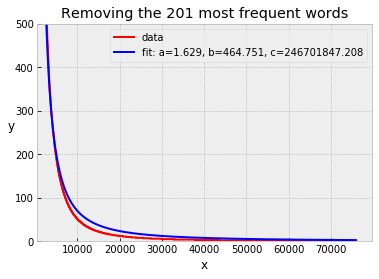

Optimal parameters: [1.62855308e+00 4.64751146e+02 2.46701847e+08]
Mean squared error: 300.26850476376546

Removing the 301 most frequent words


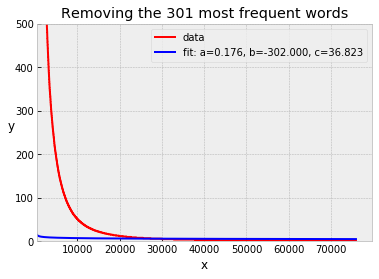

Optimal parameters: [ 1.76416424e-01 -3.01999999e+02  3.68232767e+01]
Mean squared error: 106011.53293331263

Removing the 401 most frequent words


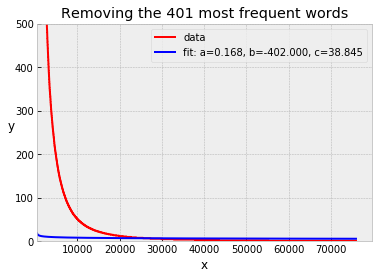

Optimal parameters: [ 1.68472449e-01 -4.02000000e+02  3.88445163e+01]
Mean squared error: 80819.92763480493

Removing the 501 most frequent words


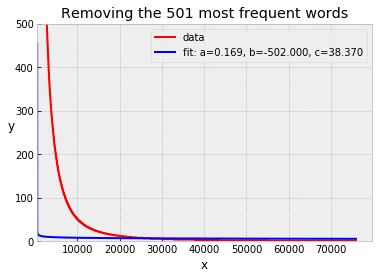

Optimal parameters: [ 1.69477075e-01 -5.02000000e+02  3.83698967e+01]
Mean squared error: 64558.25676942528

Removing the 601 most frequent words


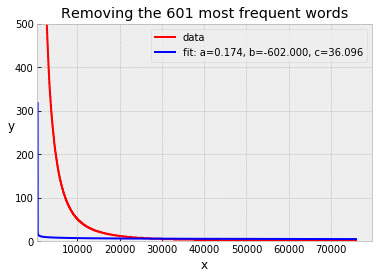

Optimal parameters: [ 1.74123992e-01 -6.01999996e+02  3.60961313e+01]
Mean squared error: 52671.35058420614

Removing the 701 most frequent words


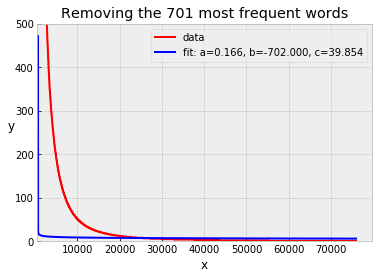

Optimal parameters: [ 1.65755420e-01 -7.02000000e+02  3.98544827e+01]
Mean squared error: 43495.69133324542

Removing the 801 most frequent words


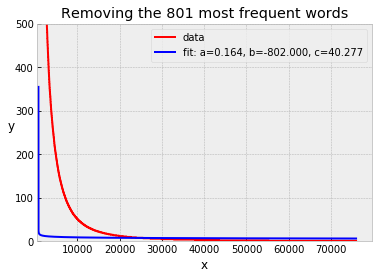

Optimal parameters: [ 1.63805689e-01 -8.01999998e+02  4.02771366e+01]
Mean squared error: 36572.22275614716

Removing the 901 most frequent words


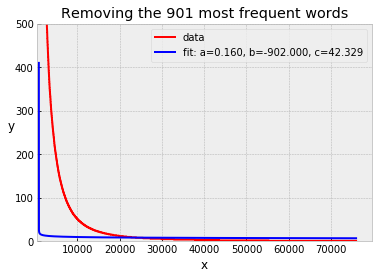

Optimal parameters: [ 1.60155073e-01 -9.01999999e+02  4.23286244e+01]
Mean squared error: 31076.550902939583

Removing the 1001 most frequent words


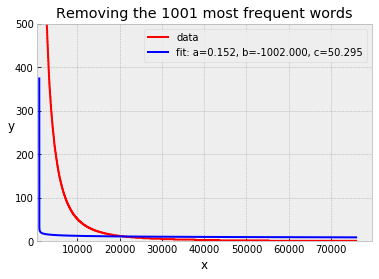

Optimal parameters: [ 1.52450152e-01 -1.00200000e+03  5.02950331e+01]
Mean squared error: 26395.142311108306

Removing the 1101 most frequent words


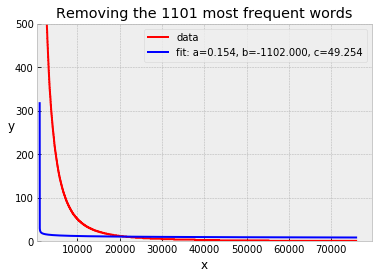

Optimal parameters: [ 1.53947220e-01 -1.10199999e+03  4.92541429e+01]
Mean squared error: 22806.353606007346

Removing the 1201 most frequent words


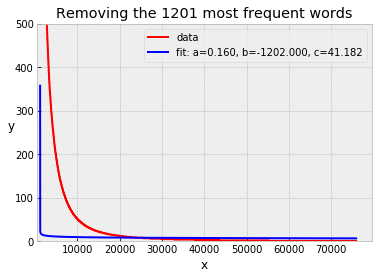

Optimal parameters: [ 1.60449785e-01 -1.20200000e+03  4.11823888e+01]
Mean squared error: 19995.628657497255

Removing the 1301 most frequent words


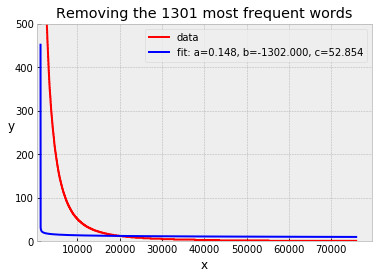

Optimal parameters: [ 1.48055078e-01 -1.30200000e+03  5.28538682e+01]
Mean squared error: 17160.19354241987

Removing the 1401 most frequent words


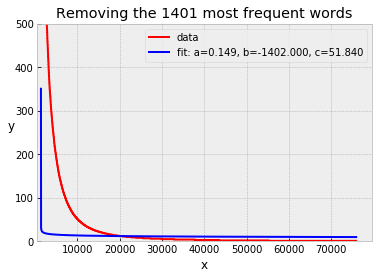

Optimal parameters: [ 1.48976481e-01 -1.40200000e+03  5.18396613e+01]
Mean squared error: 15067.470624518506

Removing the 1501 most frequent words


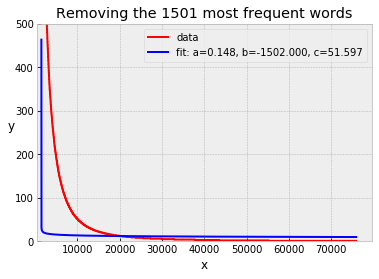

Optimal parameters: [ 1.47997996e-01 -1.50200000e+03  5.15971453e+01]
Mean squared error: 13286.663753746427

Removing the 1601 most frequent words


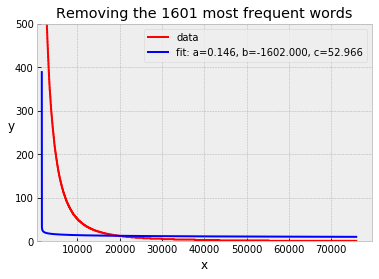

Optimal parameters: [ 1.46235517e-01 -1.60200000e+03  5.29656568e+01]
Mean squared error: 11753.586887951476

Removing the 1701 most frequent words


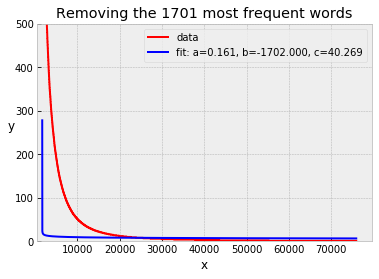

Optimal parameters: [ 1.61025999e-01 -1.70199999e+03  4.02690469e+01]
Mean squared error: 10762.615566225219

Removing the 1801 most frequent words


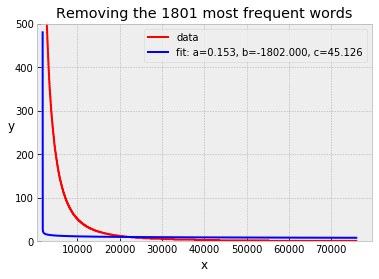

Optimal parameters: [ 1.53001071e-01 -1.80200000e+03  4.51255533e+01]
Mean squared error: 9530.174248480787

Removing the 1901 most frequent words


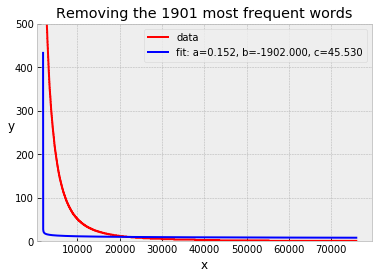

Optimal parameters: [ 1.52497922e-01 -1.90200000e+03  4.55301924e+01]
Mean squared error: 8541.762979604915

Removing the 2001 most frequent words


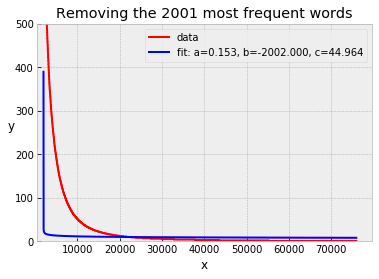

Optimal parameters: [ 1.53273489e-01 -2.00200000e+03  4.49640873e+01]
Mean squared error: 7672.947193072955

Removing the 2101 most frequent words


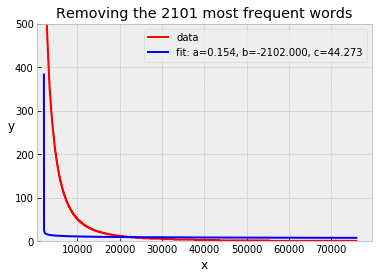

Optimal parameters: [ 1.53725546e-01 -2.10200000e+03  4.42733450e+01]
Mean squared error: 6909.765535519179

Removing the 2201 most frequent words


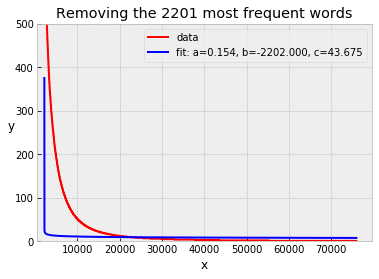

Optimal parameters: [ 1.54335376e-01 -2.20200000e+03  4.36748342e+01]
Mean squared error: 6235.638389700414

Removing the 2301 most frequent words


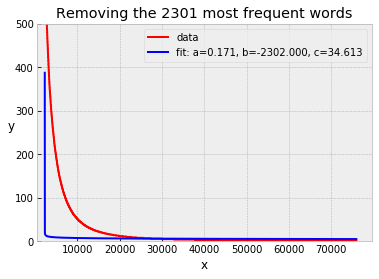

Optimal parameters: [ 1.70568602e-01 -2.30200000e+03  3.46126273e+01]
Mean squared error: 5788.5762584159

Removing the 2401 most frequent words


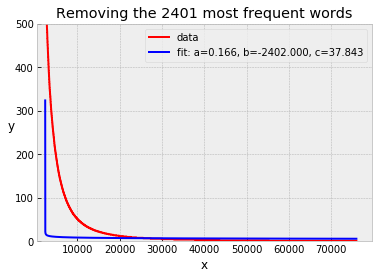

Optimal parameters: [ 1.66159564e-01 -2.40200000e+03  3.78429836e+01]
Mean squared error: 5206.66904105037

Removing the 2501 most frequent words


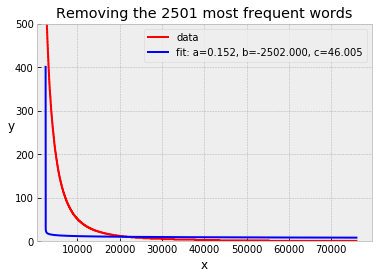

Optimal parameters: [ 1.51642952e-01 -2.50200000e+03  4.60053711e+01]
Mean squared error: 4601.454196377054

Removing the 2601 most frequent words


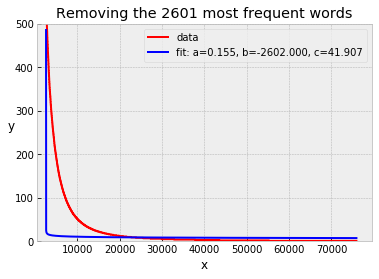

Optimal parameters: [ 1.54857402e-01 -2.60200000e+03  4.19067850e+01]
Mean squared error: 4239.164707648206

Removing the 2701 most frequent words


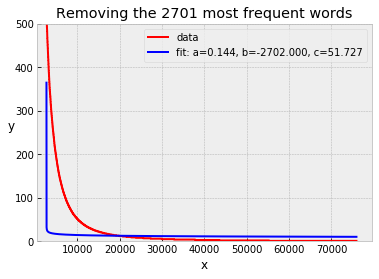

Optimal parameters: [ 1.43959244e-01 -2.70200000e+03  5.17265840e+01]
Mean squared error: 3737.62117838781

Removing the 2801 most frequent words


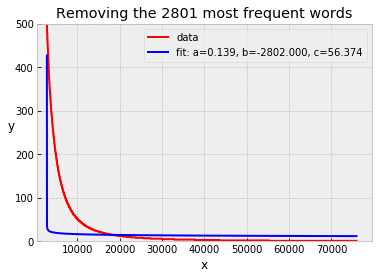

Optimal parameters: [ 1.38925923e-01 -2.80200000e+03  5.63741869e+01]
Mean squared error: 3358.2459500792465

Removing the 2901 most frequent words


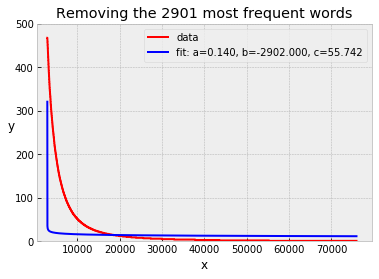

Optimal parameters: [ 1.39519977e-01 -2.90200000e+03  5.57415803e+01]
Mean squared error: 3076.5323791403234

Removing the 3001 most frequent words


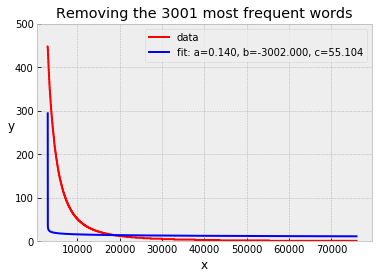

Optimal parameters: [ 1.40083485e-01 -3.00199999e+03  5.51043075e+01]
Mean squared error: 2824.6378715586493

Removing the 3101 most frequent words


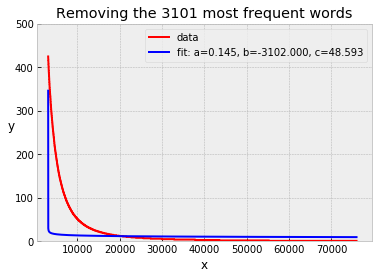

Optimal parameters: [ 1.44773593e-01 -3.10200000e+03  4.85926907e+01]
Mean squared error: 2650.4173612032123

Removing the 3201 most frequent words


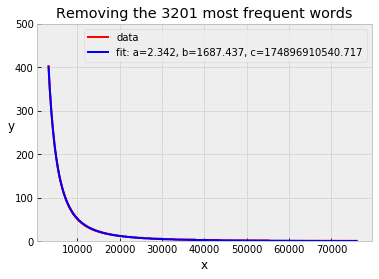

Optimal parameters: [2.34190463e+00 1.68743711e+03 1.74896911e+11]
Mean squared error: 0.23142285209311605

Removing the 3301 most frequent words


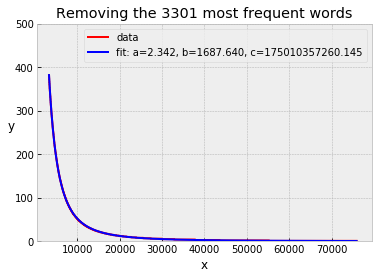

Optimal parameters: [2.34196939e+00 1.68763994e+03 1.75010357e+11]
Mean squared error: 0.23053475677058974

Log-log scales:


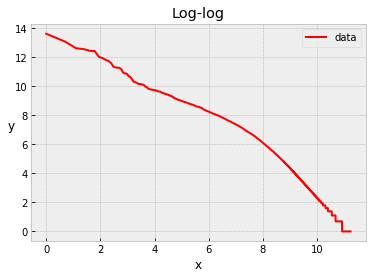

In [50]:
explore_data("cwords_arxiv.txt")